<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data


---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
csv_file = '../../../../resource-datasets/nhl_data/NHL_Data_GA.csv'
df = pd.read_csv(csv_file)

In [3]:
df.head()

Team  PTS  Rank         TOI   GF  GA  GF60  GA60   GF%    SF  ...  \
0  Washington10  121     1  2001:52:00  115  73  3.45  2.19  61.2  1112  ...   
1   Vancouver11  117     1  2056:14:00   94  72  2.74  2.10  56.6  1143  ...   
2    San Jose10  113     1  1929:54:00   90  68  2.80  2.11  57.0  1065  ...   
3     Chicago10  112     1  2020:23:00  104  83  3.09  2.46  55.6  1186  ...   
4   Vancouver12  111     1  2052:02:00   86  74  2.51  2.16  53.8  1078  ...   

    FF%    CF    CA  CF60  CA60   CF%    Sh%    Sv%   PDO   PIM  
0  51.3  2138  1935  64.1  58.0  52.5  10.34  93.03  1034  1269  
1  53.1  2144  1870  62.6  54.6  53.4   8.22  93.16  1014   985  
2  50.9  1985  1876  61.7  58.3  51.4   8.45  93.46  1019  1195  
3  58.1  2093  1572  62.2  46.7  57.1   8.77  90.44   992   966  
4  51.0  2085  1880  61.0  55.0  52.6   7.98  93.36  1013  1049  

[5 rows x 28 columns]

### 1. Load the NHL data

In [7]:
# A:
pd.set_option('display.max_columns',100,'display.max_rows',100)

### 2. Perform any required data cleaning. Do some EDA.

In [14]:
# A:
# sns.pairplot(df,hue='Rank');

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [12]:
# A:
y = df.pop('Rank')

### 4. What is the baseline accuracy?

In [15]:
# A:
y.value_counts(normalize=True)

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

In [16]:
print('Baseline accuracy is:', y.value_counts(normalize=True).max())

Baseline accuracy is: 0.34444444444444444


### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [17]:
df

Team  PTS         TOI   GF   GA  GF60  GA60   GF%    SF    SA  \
0     Washington10  121  2001:52:00  115   73  3.45  2.19  61.2  1112  1047   
1      Vancouver11  117  2056:14:00   94   72  2.74  2.10  56.6  1143  1053   
2       San Jose10  113  1929:54:00   90   68  2.80  2.11  57.0  1065  1039   
3        Chicago10  112  2020:23:00  104   83  3.09  2.46  55.6  1186   868   
4      Vancouver12  111  2052:02:00   86   74  2.51  2.16  53.8  1078  1115   
5     NY Rangers12  109  2280:29:00   86   73  2.26  1.92  54.1  1096  1075   
6      St. Louis12  109  2256:55:00   87   65  2.31  1.73  57.2  1211  1015   
7     Pittsburgh12  108  1942:18:00   93   88  2.87  2.72  51.4  1135   880   
8        Phoenix10  107  2082:24:00   75   67  2.16  1.93  52.8  1087  1017   
9     Washington11  107  2168:08:00   84   78  2.32  2.16  51.8  1152  1113   
10  Philadelphia11  106  1935:48:00  105   72  3.25  2.23  59.3  1104  1010   
11    Pittsburgh11  106  2036:20:00   87   75  2.56  2.21  53.7  1165  1022   
12      San Jose11  105  2134:14:00   85   71  2.39  2.00  54.5  1220  1058   
13       Detroit11  104  1984:21:00  105   84  3.17  2.54  55.6  1176  1071   
14     Nashville12  104  2061:44:00   90   82  2.62  2.39  52.3   972  1110   
15    New Jersey10  103  2095:56:00   84   71  2.40  2.03  54.2  1099  1025   
16     Vancouver10  103  1752:07:00   85   67  2.91  2.29  55.9   887   905   
17        Boston11  103  2048:28:00   98   70  2.87  2.05  58.3  1163  1147   
18     Tampa Bay11  103  1899:25:00   91   71  2.87  2.24  56.2  1065   897   
19  Philadelphia12  103  1908:03:00   90   82  2.83  2.58  52.3  1053   943   
20       Detroit10  102  2064:18:00   79   90  2.30  2.62  46.8  1191  1077   
21        Boston12  102  2138:08:00   91   93  2.55  2.61  49.5  1181  1128   
22       Detroit12  102  2002:10:00   88   72  2.64  2.16  55.0  1091   915   
23    New Jersey12  102  2245:54:00   67   82  1.79  2.19  45.0  1069  1044   
24   Los Angeles10  101  2146:05:00   78   68  2.18  1.90  53.4  1024   995   
25    Pittsburgh10  101  2003:17:00  101   87  3.02  2.61  53.7  1177   982   
26       Chicago12  101  2013:54:00   98   92  2.92  2.74  51.6  1143  1023   
27       Buffalo10  100  2011:04:00   75   86  2.24  2.57  46.6  1083  1065   
28     Nashville10  100  2293:29:00   93   84  2.43  2.20  52.5  1200  1127   
29       Anaheim11   99  2046:20:00   89   88  2.61  2.58  50.3   992  1153   
30     Nashville11   99  2162:34:00   93   67  2.58  1.86  58.1  1158  1106   
31       Phoenix11   99  2079:44:00   86   74  2.48  2.13  53.8  1148  1137   
32   Los Angeles11   98  2240:45:00   93   86  2.49  2.30  52.0  1097  1094   
33       Chicago11   97  2222:15:00   95   81  2.56  2.19  54.0  1311  1072   
34       Phoenix12   97  2097:03:00   91   89  2.60  2.55  50.6  1107  1158   
35       Buffalo11   96  2133:30:00   98   87  2.76  2.45  53.0  1230  1119   
36      Montreal11   96  1899:37:00   83   79  2.62  2.50  51.2  1078  1042   
37      San Jose12   96  2256:07:00   86   87  2.29  2.31  49.7  1228  1128   
38      Columbus10   95  2151:00:00   83   97  2.32  2.71  46.1  1054  1127   
39        Dallas11   95  2053:18:00   75   79  2.19  2.31  48.7   924  1088   
40   Los Angeles12   95  2188:39:00   79   64  2.17  1.75  55.2  1204   994   
41        Ottawa10   94  2057:31:00   88   91  2.57  2.65  49.2  1092   951   
42       Calgary11   94  2000:43:00   79   88  2.37  2.64  47.3  1033   976   
43       Florida12   94  2202:30:00   67   72  1.83  1.96  48.2  1121  1125   
44    NY Rangers11   93  2144:45:00   83   89  2.32  2.49  48.3  1120  1168   
45        Ottawa12   92  2091:41:00   88   96  2.52  2.75  47.8  1163  1176   
46    Washington12   92  1948:44:00   76   77  2.34  2.37  49.7   965  1003   
47        Boston10   91  2180:25:00   68   77  1.87  2.12  46.9  1153  1080   
48      Carolina11   91  1947:51:00   81   88  2.50  2.71  47.9  1013  1164   
49       Calgary10   90  2005:00:00   79   83  2.36  2.48  48.8 

In [18]:
# A:
X = df[['GF','SF','PDO','PIM']]

In [67]:
tochart = pd.concat([df.loc[:,'GF':'FA'],y],axis=1)
tochart2 = pd.concat([df.loc[:,'FF60':'PIM'],y],axis=1)

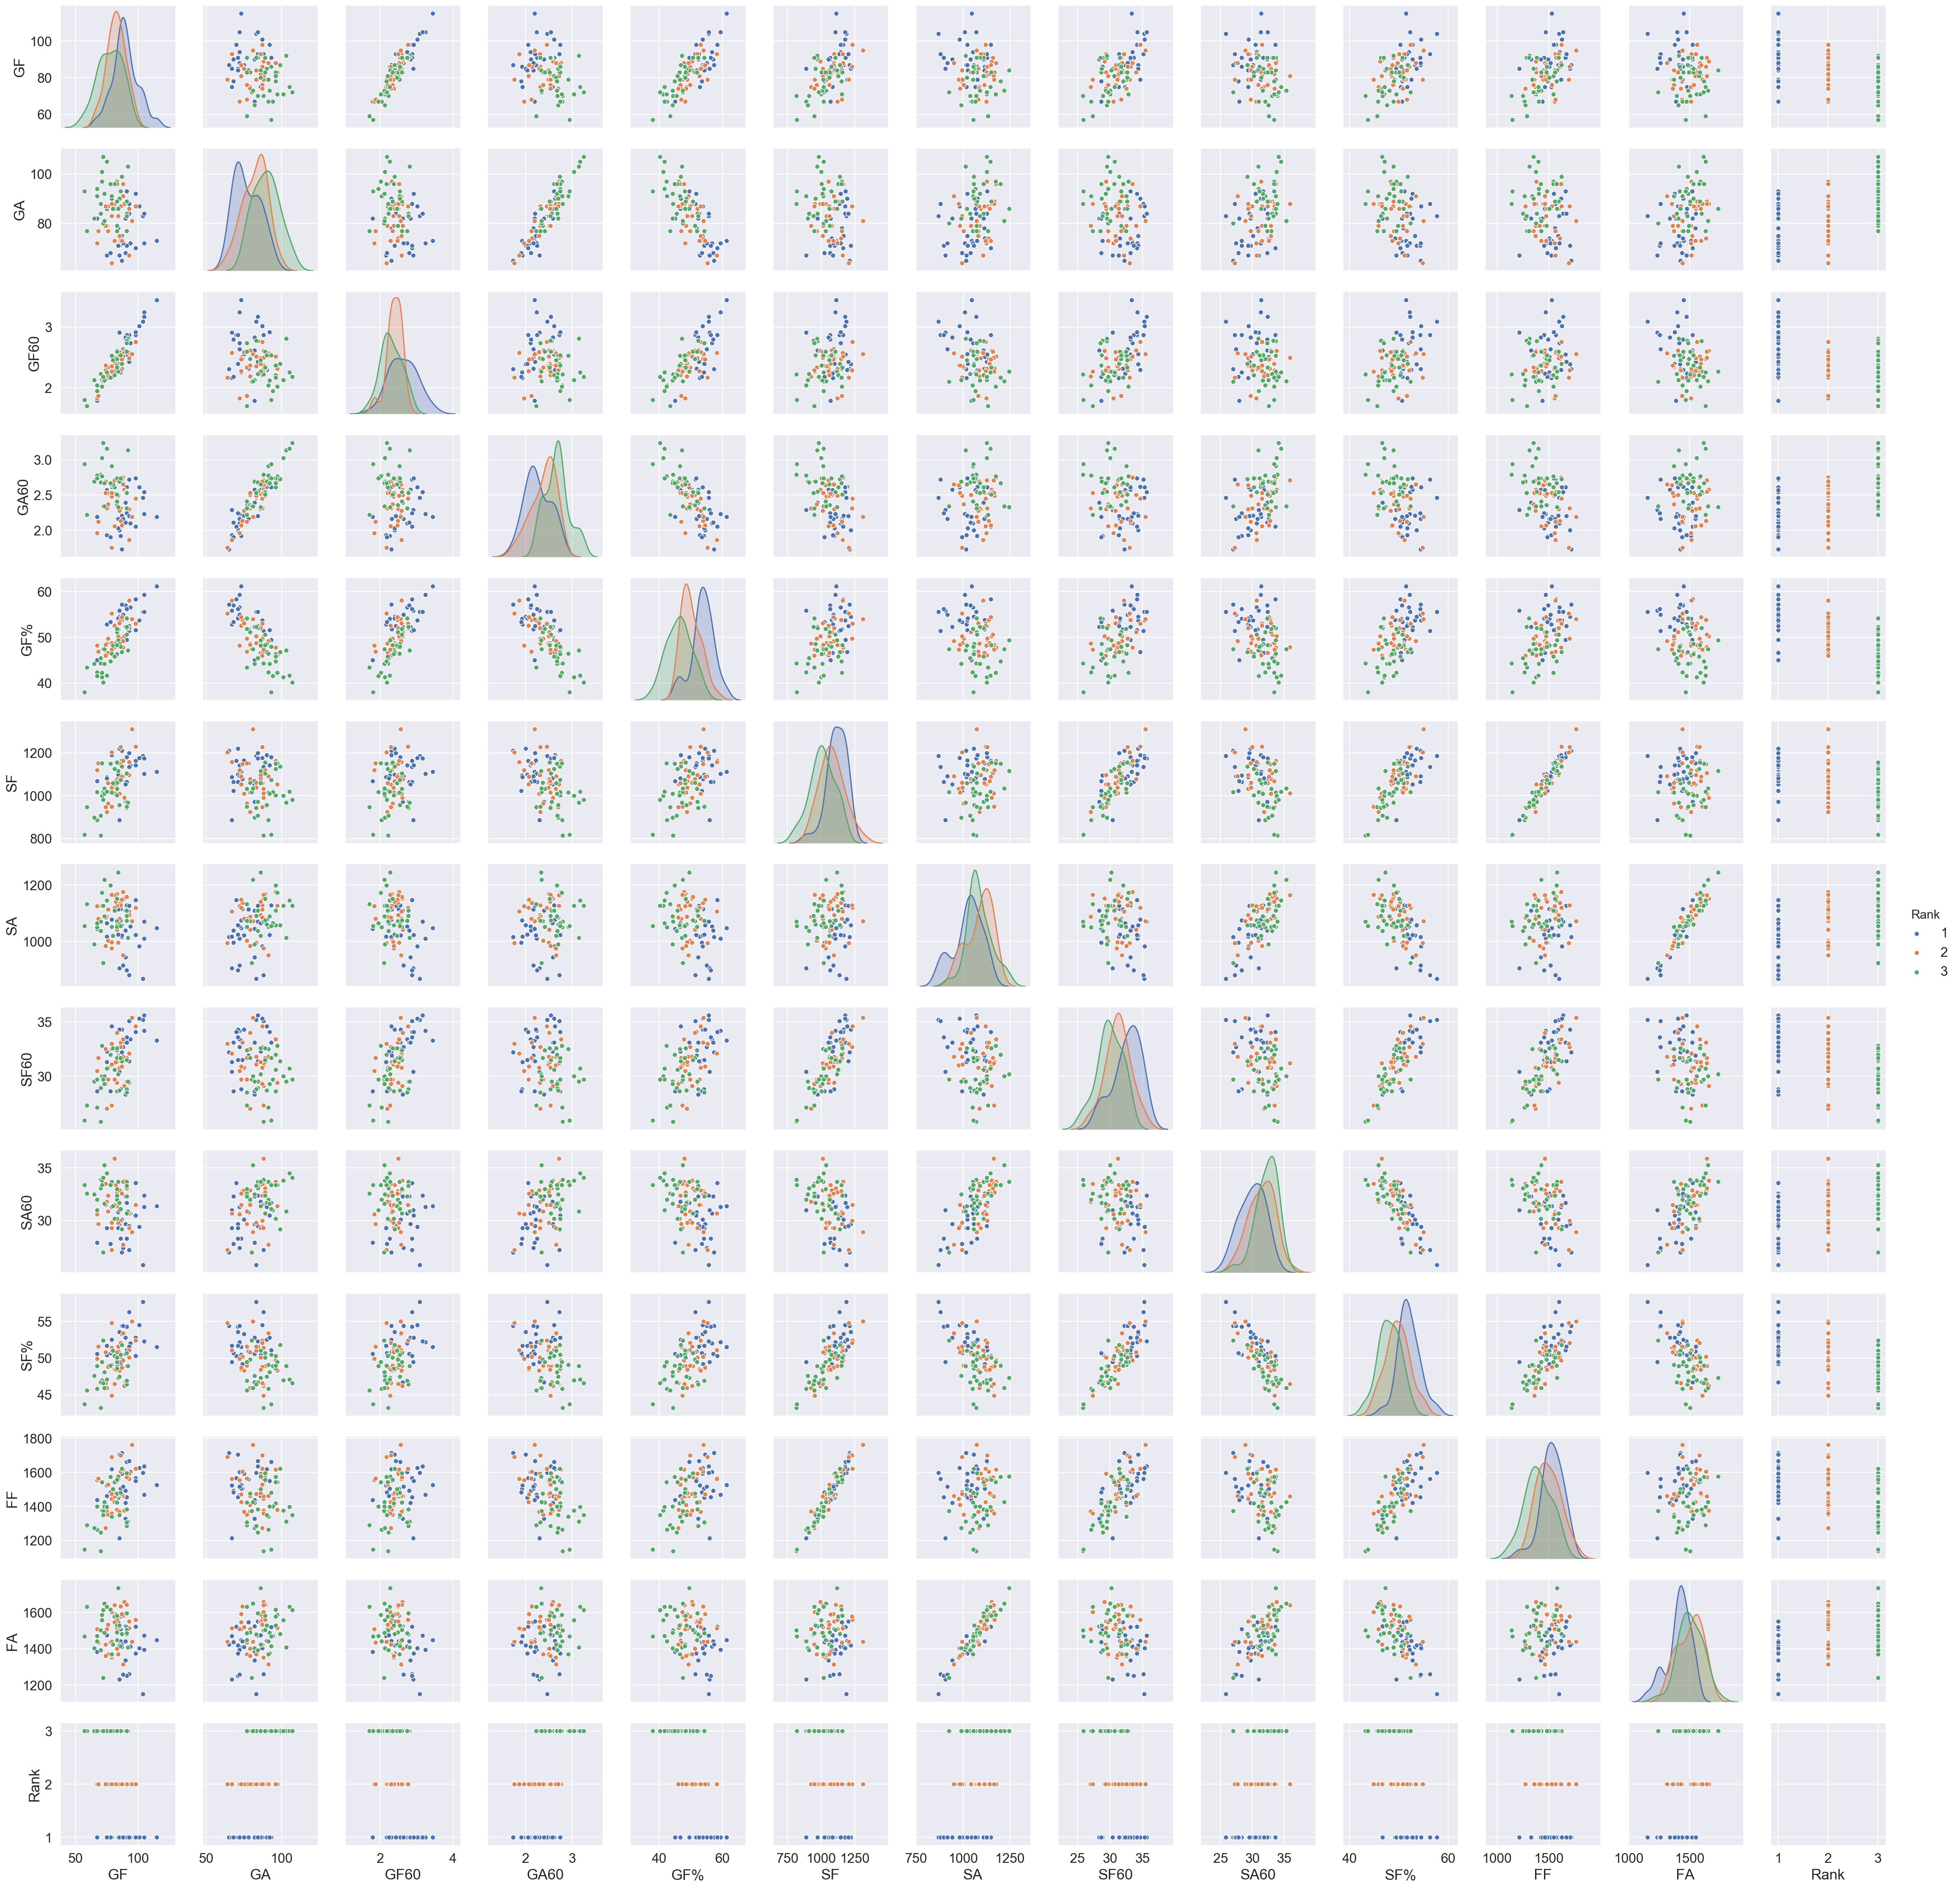

In [66]:
sns.pairplot(tochart, hue='Rank', diag_kind='kde')

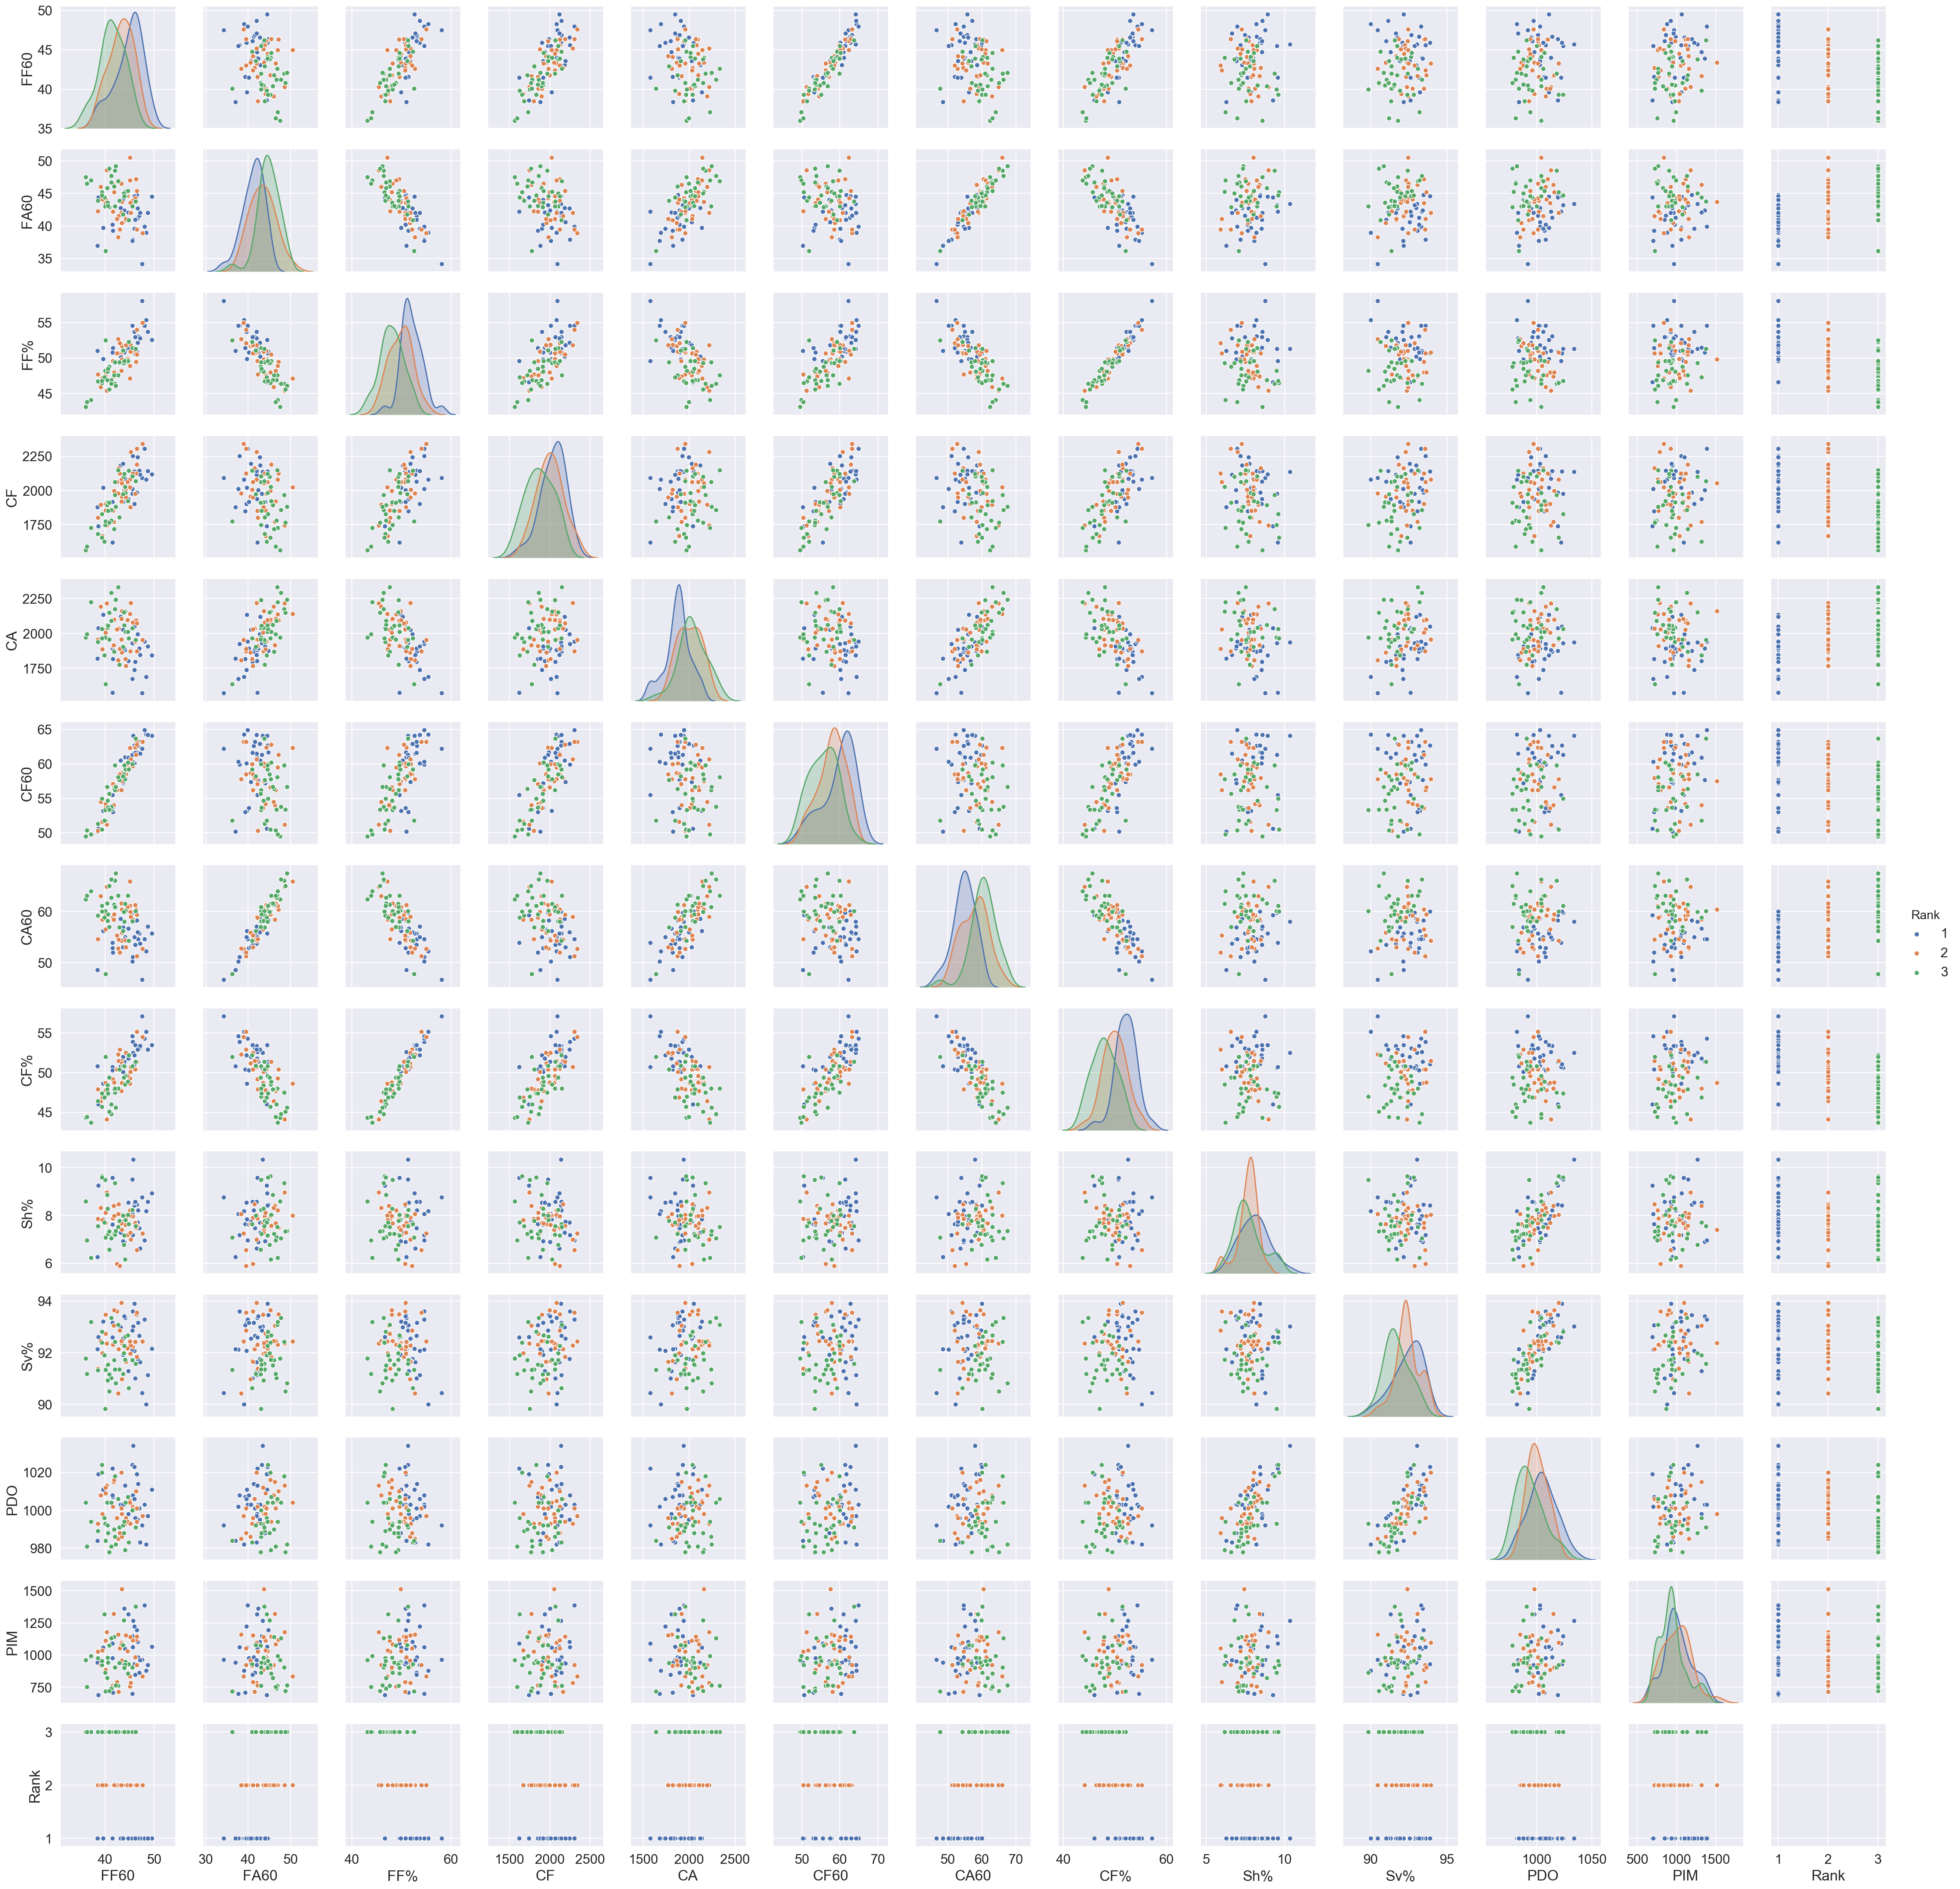

In [68]:
sns.pairplot(tochart2, hue='Rank', diag_kind='kde')

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [19]:
# A:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [50]:
# A:
knn.score(X,y)
# obviously the accuracy score = 1.0, as n=1 and model if fitted to each datapoint

1.0

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [73]:
# A:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=2, shuffle=True)
scores = cross_val_score(knn, X, y, cv=skf)

In [52]:
print(scores)
print(np.mean(scores))
# not much better than our baseline accuracy

[0.36956522 0.34090909]
0.35523715415019763


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=1)

In [76]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [77]:
print('Training score:', knn.score(X_train,y_train))
print('Test score:', knn.score(X_test,y_test))

Training score: 1.0
Test score: 0.3111111111111111


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [81]:
# A:
knn = KNeighborsClassifier(n_neighbors=len(X_train))
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

In [82]:
knn.score(X_train,y_train)
# clearly this goes back to giving me the baseline, as for each point we're just taking the average of all points.

0.4666666666666667

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [93]:
# A:
scores = []
max_k = int(len(X_train)*0.5)    # make sure max_k is same as size of each fold, so we have 2 folds in this case
for k in range(1,max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn,X_train,y_train,cv=skf)))

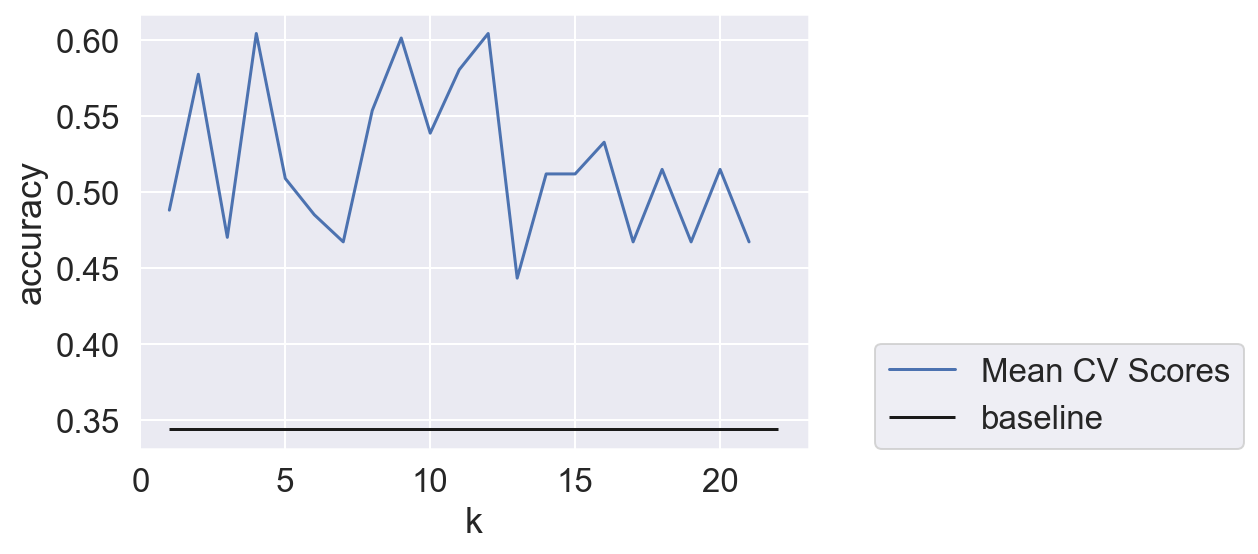

In [94]:
plt.plot(range(1, max_k), scores, label='Mean CV Scores')
plt.hlines(y.value_counts(normalize=True).max(), 1, max_k, label='baseline')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(loc=[1.1, 0])
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [57]:
# A:
skf = StratifiedKFold(n_splits=5, shuffle=True)

scores = []
max_k = int(len(X_train)/2) # update to mathc fold lenght
for k in range(1,max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn,X,y,cv=skf)))

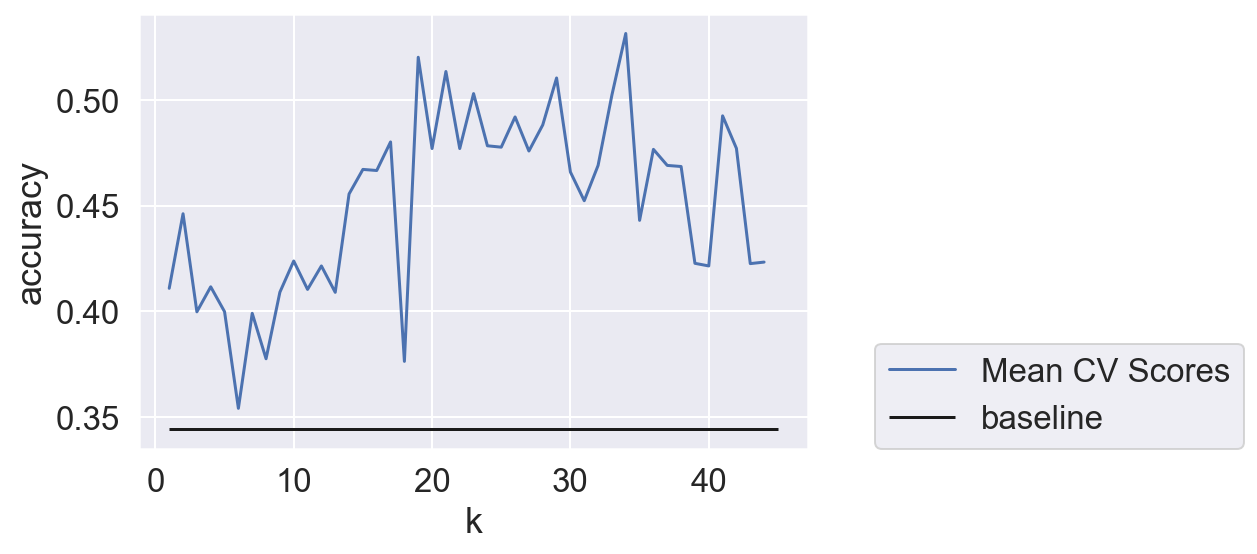

In [58]:
plt.plot(range(1, max_k), scores, label='Mean CV Scores')
plt.hlines(y.value_counts(normalize=True).max(), 1, max_k, label='baseline')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(loc=[1.1, 0])
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [59]:
# A:
scores = []
max_k = int(len(Xs)/2)
for k in range(1,max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn,Xs,y,cv=skf)))

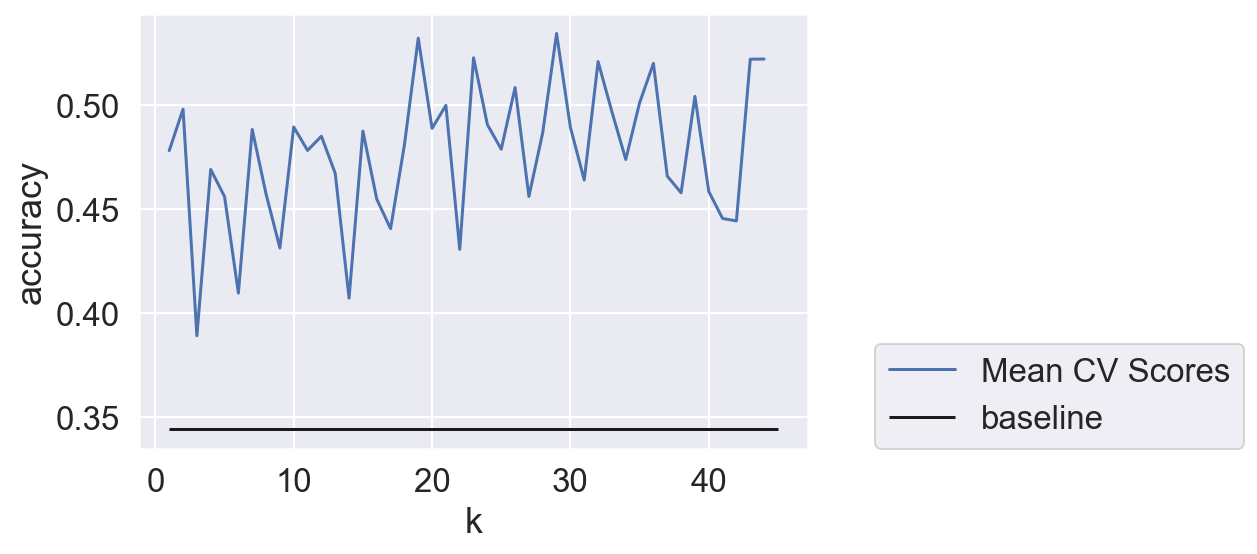

In [60]:
plt.plot(range(1, max_k), scores, label='Mean CV Scores')
plt.hlines(y.value_counts(normalize=True).max(), 1, max_k, label='baseline')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(loc=[1.1, 0])
plt.show()